In [1]:
import torch
import torch.nn as nn
import torch.utils.data as utildata
import torchvision.datasets as ds
import torchvision.transforms as transforms
import os
from tkinter import *
from PIL import Image,ImageDraw

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
classes = 10 # 0~9

In [3]:
# Deep NN Midel (feed-forward network)
class myNN(nn.Module):
  def __init__(self, classes = 10):
    super(myNN,self).__init__()
    self.layer1 = nn.Linear(in_features=784, out_features=512, bias=True) # layer
    self.layer2 = nn.Linear(in_features=512, out_features=512, bias=True)
    self.layer3 = nn.Linear(in_features=512, out_features=512, bias=True)
    self.layer4 = nn.Linear(in_features=512, out_features=512, bias=True)
    self.layer5 = nn.Linear(in_features=512, out_features=256, bias=True)
    self.layer6 = nn.Linear(in_features=256, out_features=128, bias=True)
    self.layer7 = nn.Linear(in_features=128, out_features=64, bias=True)
    self.layer8 = nn.Linear(in_features=64, out_features=10, bias=True)
  def forward(self, input):
    res = nn.functional.relu(self.layer1(input)) # activation function
    res = nn.functional.relu(self.layer2(res))
    res = nn.functional.relu(self.layer3(res))
    res = nn.functional.relu(self.layer4(res))
    res = nn.functional.relu(self.layer5(res))
    res = nn.functional.relu(self.layer6(res))
    res = nn.functional.relu(self.layer7(res))
    res = nn.functional.relu(self.layer8(res))
    return res

In [4]:
model = myNN(classes).to(device)

In [5]:
model.load_state_dict(torch.load('./model/myNN.pkl'))

In [6]:
model.eval()

myCNN(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=1568, out_features=10, bias=True)
)

5

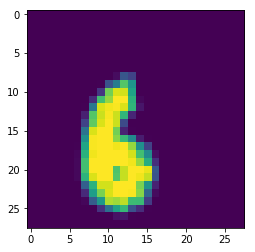

In [9]:
from tkinter import *
from PIL import Image,ImageDraw
import matplotlib
import matplotlib.pyplot as plt

current_num = -1;
def check():
    global current_num
    global textLabel
    img = Image.open('./img/img.png')
    loader = transforms.Compose([transforms.Scale(28),transforms.Grayscale(1), transforms.ToTensor()])
    img = loader(img).float()
    img = abs(img - 1)
    img = img.view(-1,784)
    img = img.to(device)
    outputs = model(img)
    _, predicted = torch.max(outputs.data, 1)
    return predicted.data.tolist()[0]
def checkgo():
    try:
        a = check()
        return a
    except:
        checkgo()
check()

In [10]:
class ImageGenerator:
    def __init__(self,parent,posx,posy,*kwargs):
        self.parent = parent
        self.posx = posx
        self.posy = posy
        self.sizex = 200
        self.sizey = 200
        self.b1 = "up"
        self.xold = None
        self.yold = None
        self.drawing_area=Canvas(self.parent,width=self.sizex,height=self.sizey+10)
        self.drawing_area.place(x=self.posx,y=self.posy)
        self.drawing_area.bind("<Motion>", self.motion)
        self.drawing_area.bind("<ButtonPress-1>", self.b1down)
        self.drawing_area.bind("<ButtonRelease-1>", self.b1up)
        self.drawing_area.place(x=self.sizex/7,y=self.sizex/7)
        self.button=Button(self.parent,text="Done!",width=8,command=self.save)
        self.button.place(x=30,y=self.sizey+50)
        self.button1=Button(self.parent,text="Clear!",width=8,command=self.clear)
        self.button1.place(x=135,y=self.sizey+50)

        self.image=Image.new("RGB",(200,200),(255,255,255))
        self.draw=ImageDraw.Draw(self.image)

    def save(self):
        filename = "./img/img.png"
        self.image.save(filename)
        print("Predict : "+ str(checkgo()))

    def clear(self):
        self.drawing_area.delete("all")
        self.image=Image.new("RGB",(200,200),(255,255,255))
        self.draw=ImageDraw.Draw(self.image)

    def b1down(self,event):
        self.b1 = "down"

    def b1up(self,event):
        self.b1 = "up"
        self.xold = None
        self.yold = None

    def motion(self,event):
        if self.b1 == "down":
            if self.xold is not None and self.yold is not None:
                event.widget.create_line(self.xold,self.yold,event.x,event.y,smooth='true',width=15,fill='black')
                self.draw.line(((self.xold,self.yold),(event.x,event.y)),(0,128,0),width=30)

        self.xold = event.x
        self.yold = event.y

Predict : 7
Predict : 0
Predict : 9
Predict : 0


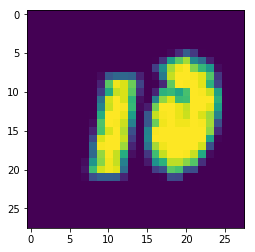

In [11]:
root = Tk()
root.wm_geometry("%dx%d+%d+%d" % (265, 300, 10, 10))
root.config(bg='gray')
ImageGenerator(root,10,10)
root.mainloop()